In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import glob 
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split

In [32]:
ds_samples = []
org_samples = []
count = 0
for i in glob.glob('../input/dasatset-1/Visible_cropped/*/*.pgm'):
    a = plt.imread(i)
    a = cv2.resize(a,(120,120))
    org_samples.append(a)
    a = (a - a.min())/(a.max()-a.min())
    a = downscale_local_mean(a, (2, 2))
    a = cv2.resize(a,(60,60))
    ds_samples.append(a)
print('Done!')

Done!


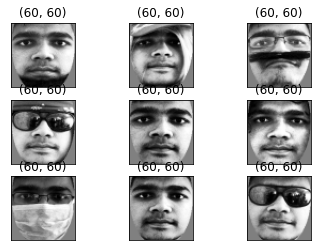

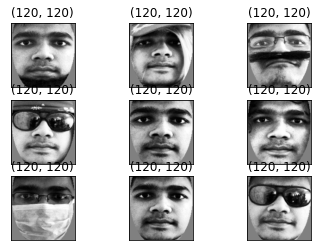

In [33]:
import glob 
import matplotlib.pyplot as plt
import cv2
import numpy as np



for j in range(1,10):
    plt.subplot(3,3,j)
    plt.imshow(ds_samples[j])
    plt.title(ds_samples[j].shape)
    plt.xticks([])
    plt.yticks([])
    plt.gray()

plt.show()

for j in range(1,10):
    plt.subplot(3,3,j)
    plt.imshow(org_samples[j])
    plt.title(org_samples[j].shape)
    plt.xticks([])
    plt.yticks([])
    plt.gray()

plt.show()

In [38]:
class mygan_sr():
    
    
    def generator(lr_samples):
        
#       =============================LR to HR_model==============================
        a = []
        for i in range(len(lr_samples)):
            if np.array(lr_samples[i]).shape[0]==120:
                a.append(cv2.resize(np.array(lr_samples[i]),(60,60)))
            else:
                pass
        if len(a) != 0:
            lr_samples = a
        else:
            pass
            

        input_img = Input(shape=(60, 60, 1))
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
        
        model = Model(input_img, x)
        model.compile(optimizer='adam', loss='mse')
        
        X_train, X_test, y_train, y_test = lr_samples[:500],lr_samples[500:],lr_samples[:500],lr_samples[500:]
        
        print()
        print('Generator is Generating Samples......Cool!!')
        print()
        model.fit(np.expand_dims(np.array(X_train),axis = -1), np.expand_dims(np.array(y_train),axis = -1), epochs = 30, shuffle = False)
        
        pred_x = model.predict(np.expand_dims(np.array(X_train),axis = -1))
        
        sr_conv_train_samples = []
        for i in pred_x:
            sr_conv_train_samples.append(cv2.resize(i,(120,120)))
            
        sr_conv_test_samples = []
        for i in X_test:
            sr_conv_test_samples.append(cv2.resize(i,(120,120)))
                    
        
        
        return(sr_conv_train_samples, sr_conv_test_samples)  
        
        
        
    def discriminator(ds_samples, org_samples):
        
#       =============================HR to SR_model Discriminator ==============================   

        print()
        
        sr_conv_train_samples, sr_conv_test_samples = mygan_sr.generator(ds_samples)

        
        X_train = sr_conv_train_samples 
        y_train = org_samples[:500]
        
        input_img = Input(shape=(120, 120, 1))
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
        
        model_sr = Model(input_img, x)
        
        model_sr.compile(optimizer='adamax', loss='mse')
        print()
        print('GAN Discriminator is Working Hard Maaan.....')
        print()
        model_sr.fit(np.expand_dims(np.array(X_train),axis = -1), np.expand_dims(np.array(y_train),axis = -1), epochs = 25, shuffle = False)        
        
        output_1 = model_sr.predict(np.expand_dims(np.array(sr_conv_train_samples),axis = -1)) 
        sr_conv_train_samples, sr_conv_test_samples = mygan_sr.generator(output_1)
        
        X_train = sr_conv_train_samples 
        y_train = org_samples[:500]
        
        model_sr.fit(np.expand_dims(np.array(X_train),axis = -1), np.expand_dims(np.array(y_train),axis = -1), epochs = 25, shuffle = False)
        
        output = model_sr.predict(np.expand_dims(np.array(org_samples[500:]),axis = -1))      
        
        
        return(output)
    



Generator is Generating Samples......Cool!!

Epoch 1/30
16/16 [==============================] - 1s 61ms/step - loss: 2.3546
Epoch 2/30
16/16 [==============================] - 1s 60ms/step - loss: 0.1317
Epoch 3/30
16/16 [==============================] - 1s 61ms/step - loss: 0.0758
Epoch 4/30
16/16 [==============================] - 1s 61ms/step - loss: 0.0674
Epoch 5/30
16/16 [==============================] - 1s 60ms/step - loss: 0.0406
Epoch 6/30
16/16 [==============================] - 1s 61ms/step - loss: 0.0213
Epoch 7/30
16/16 [==============================] - 1s 60ms/step - loss: 0.0124
Epoch 8/30
16/16 [==============================] - 1s 60ms/step - loss: 0.0098
Epoch 9/30
16/16 [==============================] - 1s 59ms/step - loss: 0.0063
Epoch 10/30
16/16 [==============================] - 1s 59ms/step - loss: 0.0043
Epoch 11/30
16/16 [==============================] - 1s 61ms/step - loss: 0.0031
Epoch 12/30
16/16 [==============================] - 1s 61ms/step - los

16/16 [==============================] - 4s 224ms/step - loss: 190.5664
Epoch 14/25
16/16 [==============================] - 4s 224ms/step - loss: 175.2560
Epoch 15/25
16/16 [==============================] - 4s 224ms/step - loss: 162.4684
Epoch 16/25
16/16 [==============================] - 4s 224ms/step - loss: 153.7233
Epoch 17/25
16/16 [==============================] - 4s 223ms/step - loss: 147.6477
Epoch 18/25
16/16 [==============================] - 4s 224ms/step - loss: 141.8319
Epoch 19/25
16/16 [==============================] - 4s 224ms/step - loss: 138.0088
Epoch 20/25
16/16 [==============================] - 4s 224ms/step - loss: 135.4633
Epoch 21/25
16/16 [==============================] - 4s 224ms/step - loss: 134.5040
Epoch 22/25
16/16 [==============================] - 4s 224ms/step - loss: 131.5738
Epoch 23/25
16/16 [==============================] - 4s 225ms/step - loss: 129.9950
Epoch 24/25
16/16 [==============================] - 4s 225ms/step - loss: 129.2137
Epoc

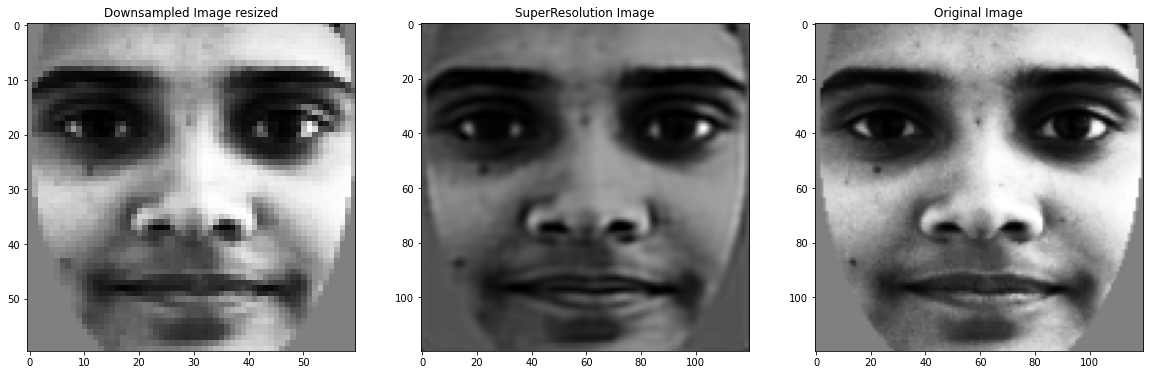

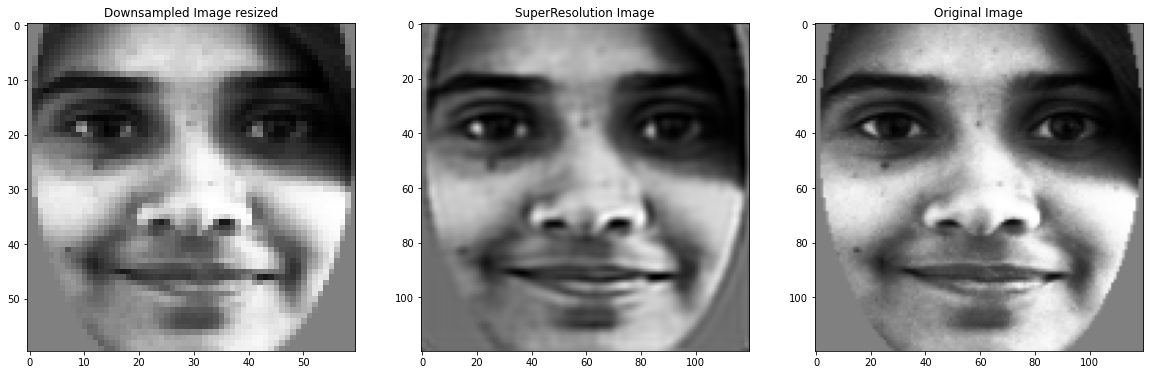

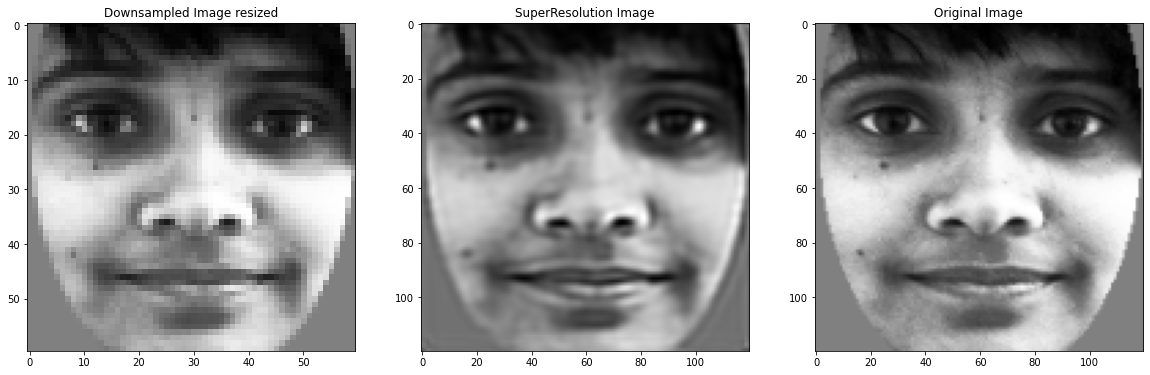

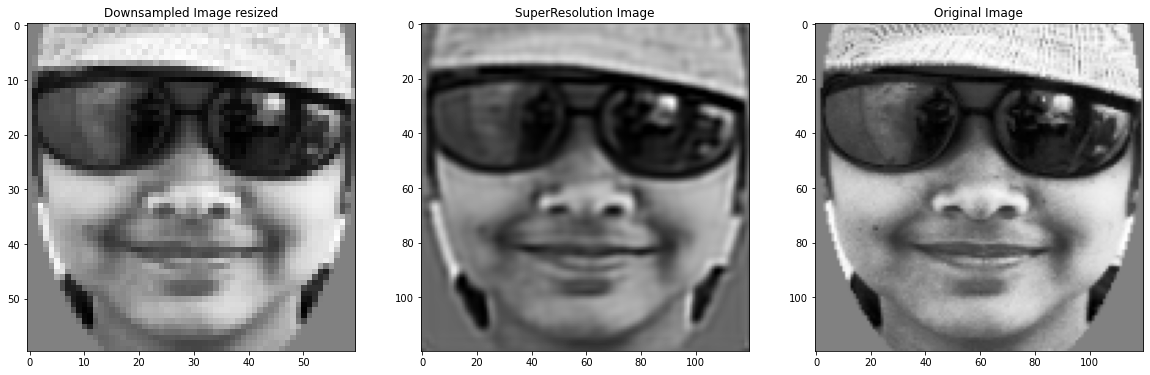

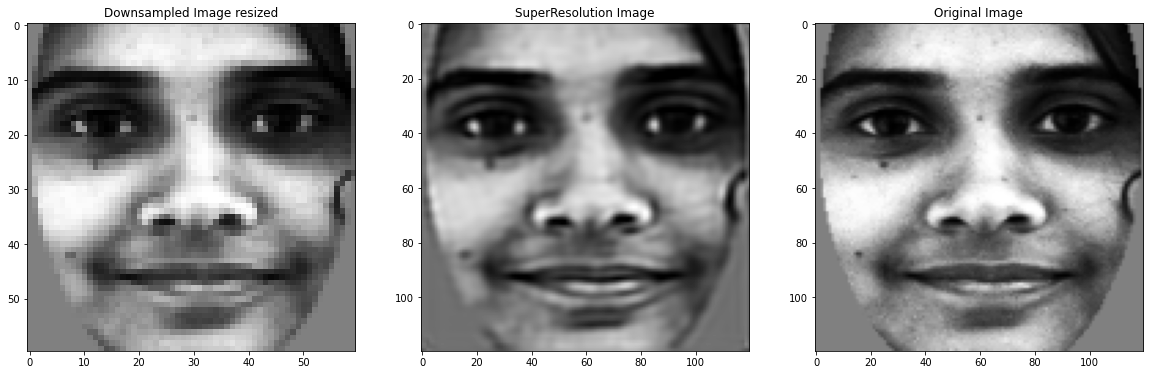

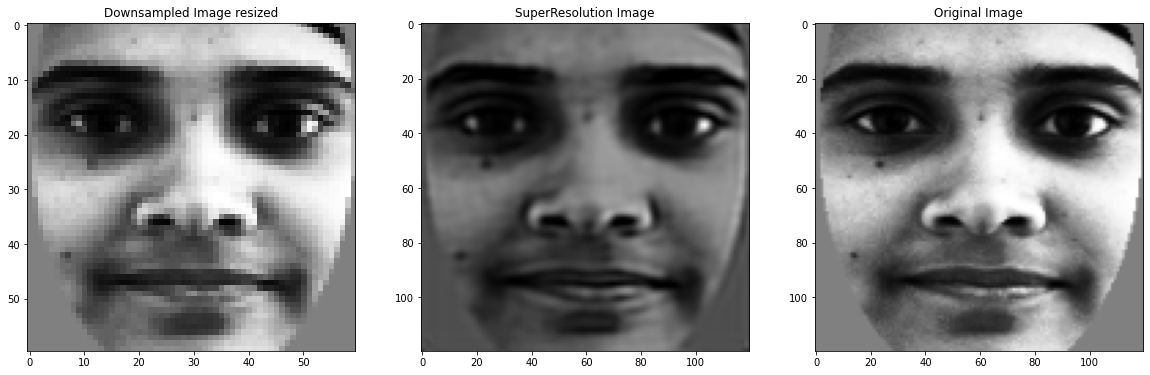

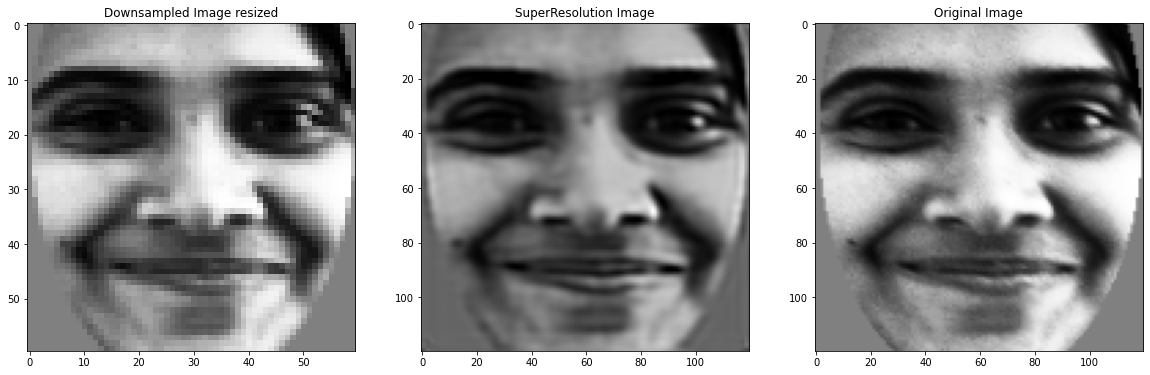

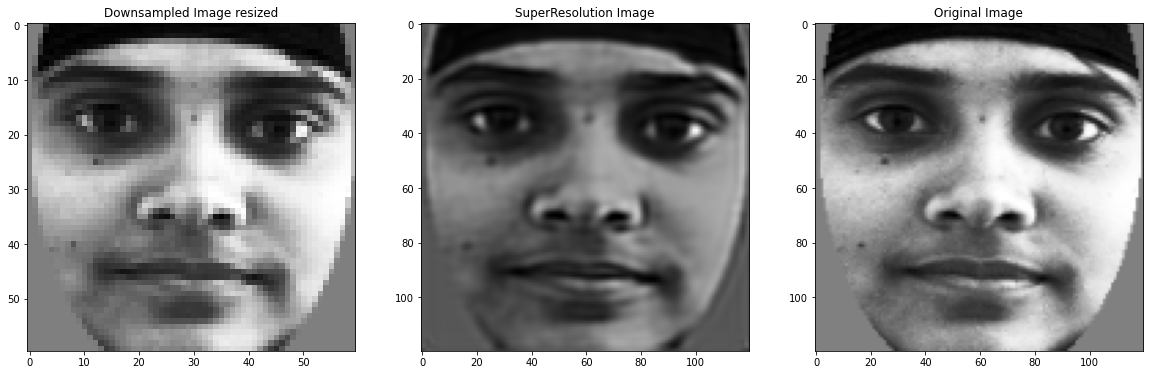

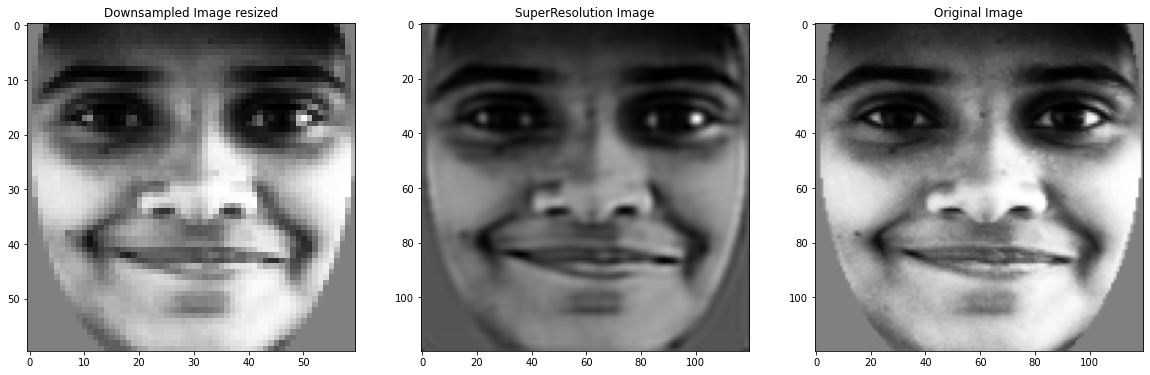

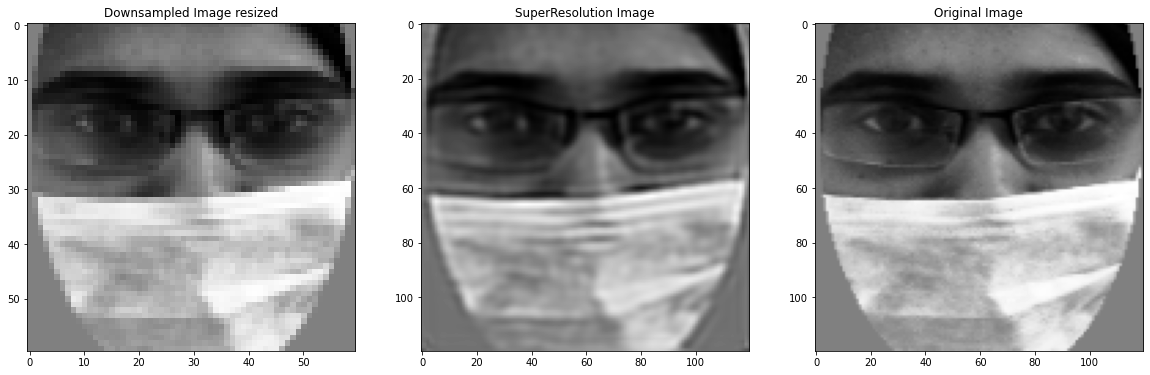

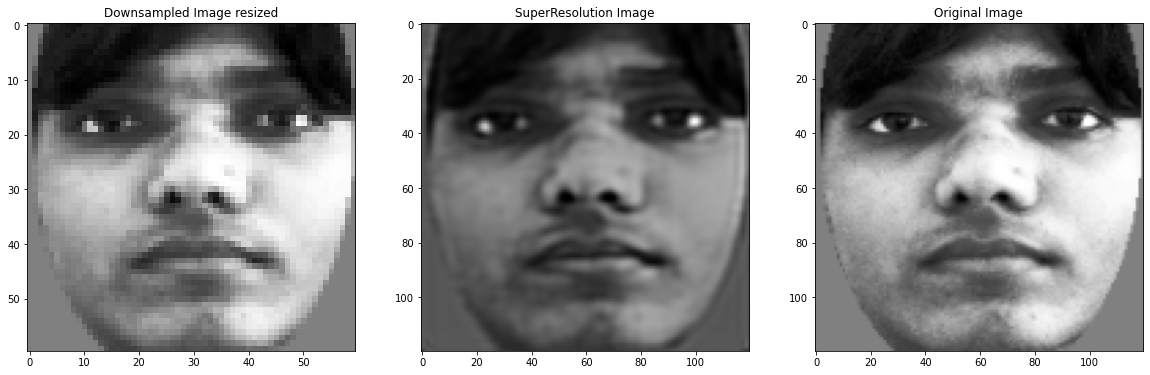

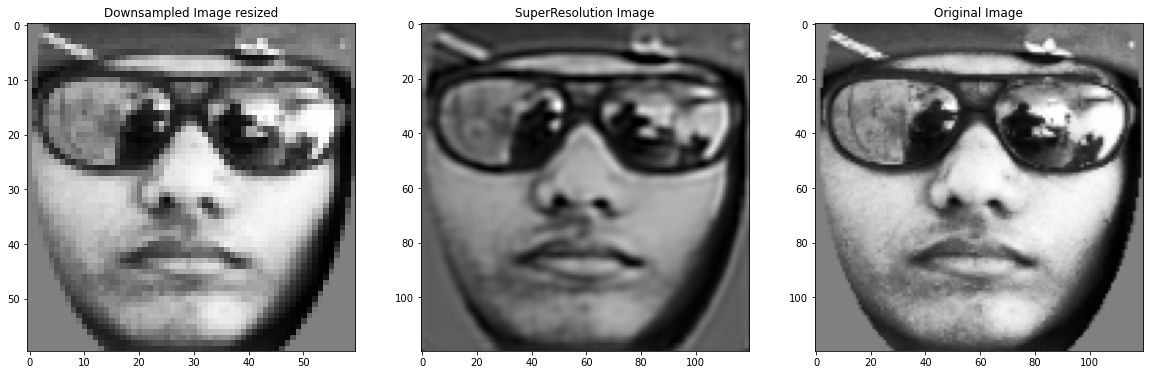

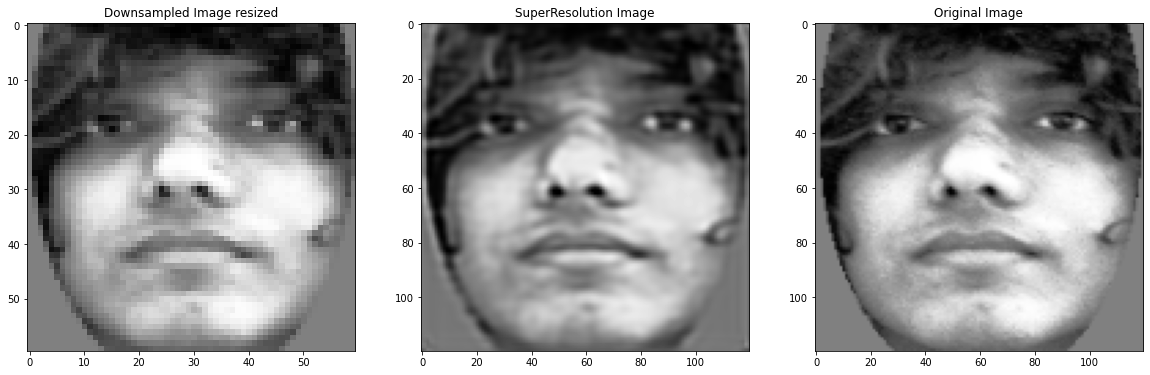

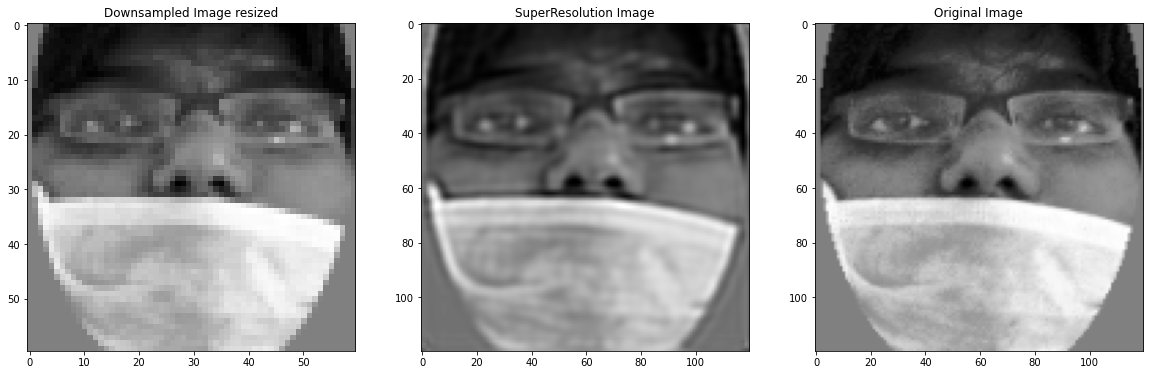

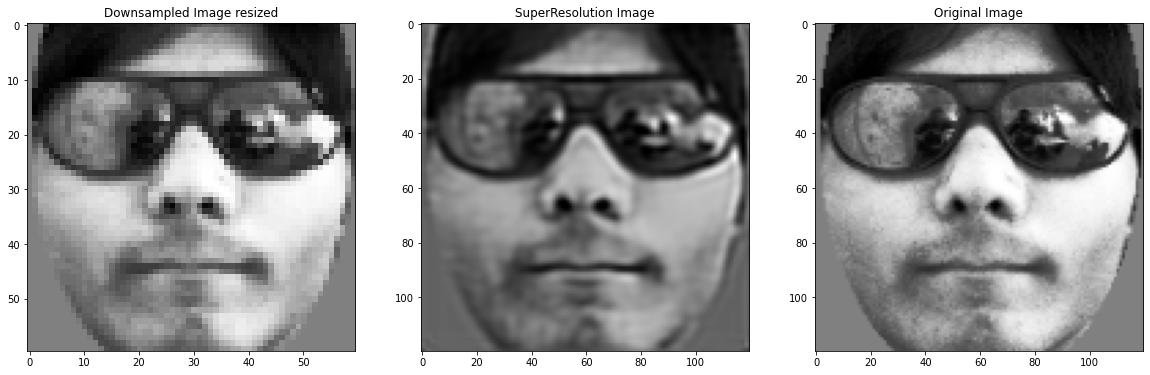

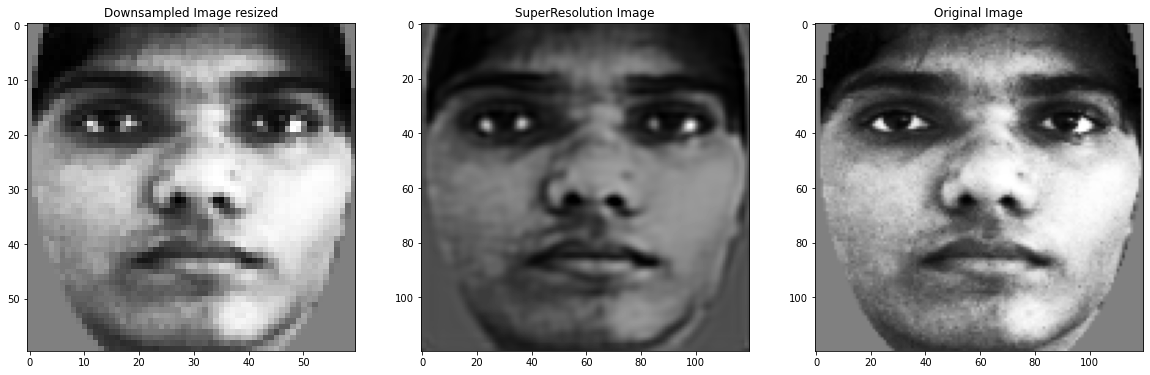

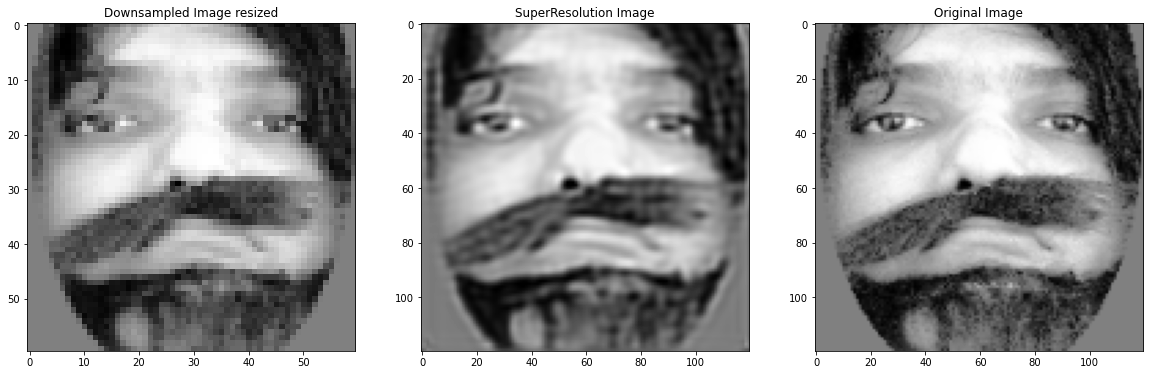

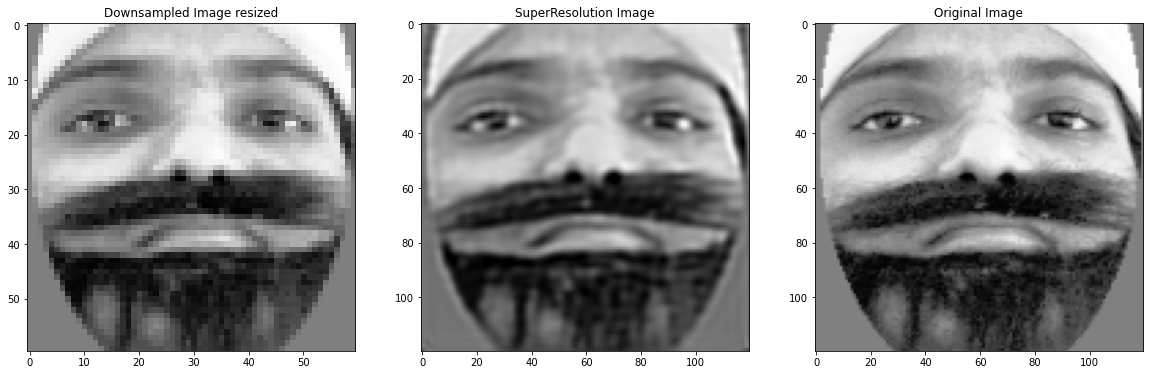

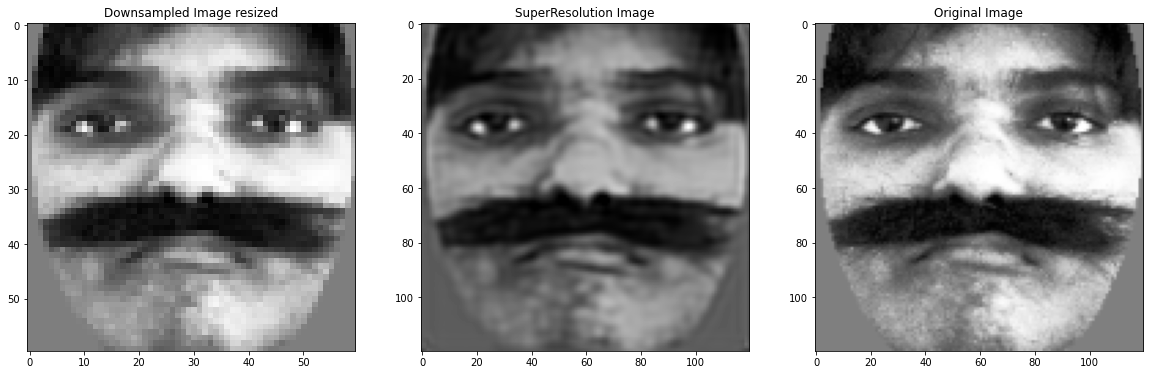

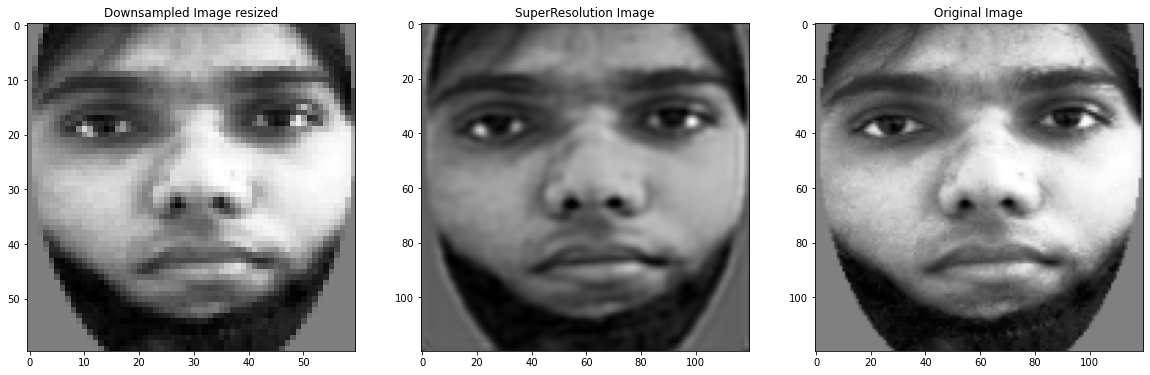

In [39]:
OutPut = mygan_sr.discriminator(ds_samples, org_samples)

count = 0

for i in range(20):
    plt.figure(figsize = (20,20))

    plt.subplot(1,3,1)
    plt.title('Downsampled Image resized')
    plt.imshow(np.array(ds_samples[500:])[i])

    plt.subplot(1,3,2)
    plt.title('SuperResolution Image')
    plt.imshow(OutPut[i].reshape((120,120)))

    plt.subplot(1,3,3)
    plt.title('Original Image')
    plt.imshow(org_samples[500:][i])

    plt.show()
    count+=1